## Classification_Mixture distribution

### 混合分布モデルとは？
・いくつかの確率モデルを 組み合わせることによってより複雑な関数形を表 現できるようにした確率モデル <br>
・自然現象や社会現象などをモデル化しようとするとき, 母集団が均一でない場合も多く存在し, 結果として非常に複雑な現象が起こっていることからモデル化が難しいことがある.<br>
・このような複雑な確率現象のモデル化において, 非常に汎用性の高いモデリング手法を提供する混合分布モデルは強力なツールとなる

### 混合分布モデルの問題点
・パラメータの推定が困難な場合がある<br>
・特にパラメータの推定量としてよく使われる最尤推定量が, 混合分布モデルの場合には必ずし も良い推定量ではない

In [68]:
n.gr <- 3 # number of component distributions
d <- 2 # dimension

In [69]:
f <- runif(n.gr)

In [70]:
f

[1] 0.5018554 0.7481696 0.5014221

<font color="blue">runif:　一様分布乱数生成</font>

In [71]:
f <- f/sum(f)

In [72]:
f #Fraction of n.gr distributions

[1] 0.2865376 0.4271722 0.2862902

In [73]:
# means
ms <- matrix(runif(n.gr*d),ncol=d)*15

In [74]:
ms　# 0〜15までの一様分布から変数を6個

2.582094,9.003296
10.208532,12.539896
13.041209,11.998206


In [75]:
n.gr*d

[1] 6

In [86]:
# Sampling
n.sample <- 500
gr.label <- sample(1:3,n.sample,replace=TRUE,prob=f)
table(gr.label)

gr.label
  1   2   3 
145 208 147 

In [78]:
# locations of samples
X <- matrix(0,n.sample,d)
head(X)

0,0
0,0
0,0
0,0
0,0
0,0


<font color="blue">500行（n.sample）2列(d)で、全てのelementが0の行列<font>

In [88]:
for(i in 1:n.sample){
    this.gr <- gr.label[i]　#1,2,3からなる500個のlist
    X[i,] <- c(rnorm(1,ms[this.gr,1]),rnorm(1,ms[this.gr,2]))
    #ms行列内の[this.gr行,*列]を平均値とする正規分布から1個変数をとる
}
head(gr.label)
ms
head(X)

[1] 3 2 3 2 2 2

2.582094,9.003296
10.208532,12.539896
13.041209,11.998206


13.77774,13.71825
11.21555,12.09548
12.95370,11.10066
10.09322,16.58845
13.24025,11.74930
10.46679,12.37464


<font color="blue">rnormの引数は、n・mean・sd<br>
①(2.58、9.00)、②(10.20、12.53)、③(13.04,11,99)の3点を中心に正規分布する点を作成
<font>

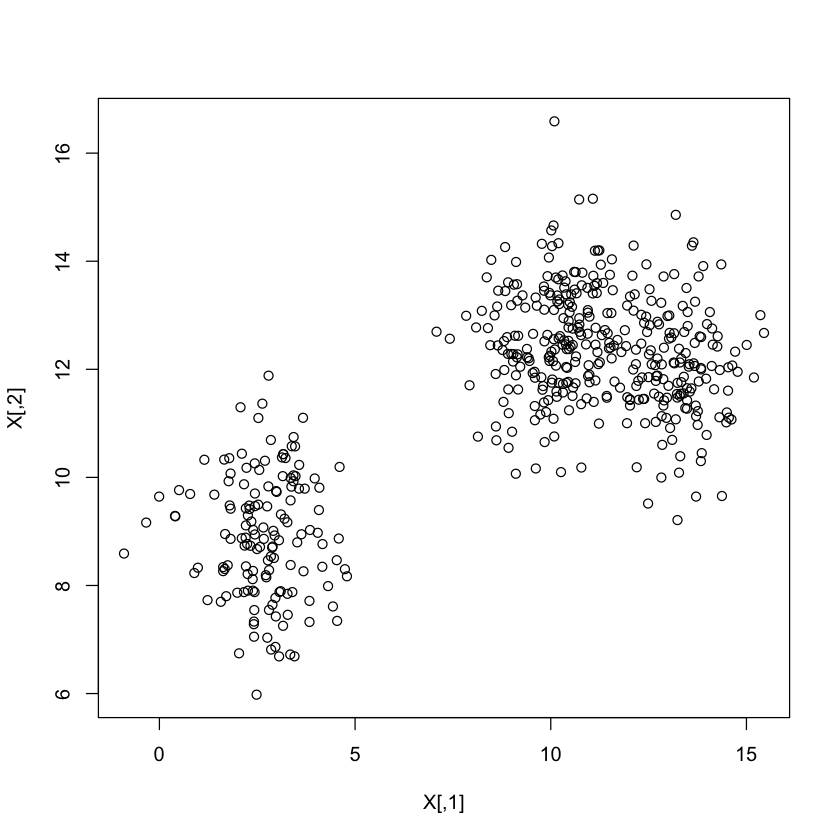

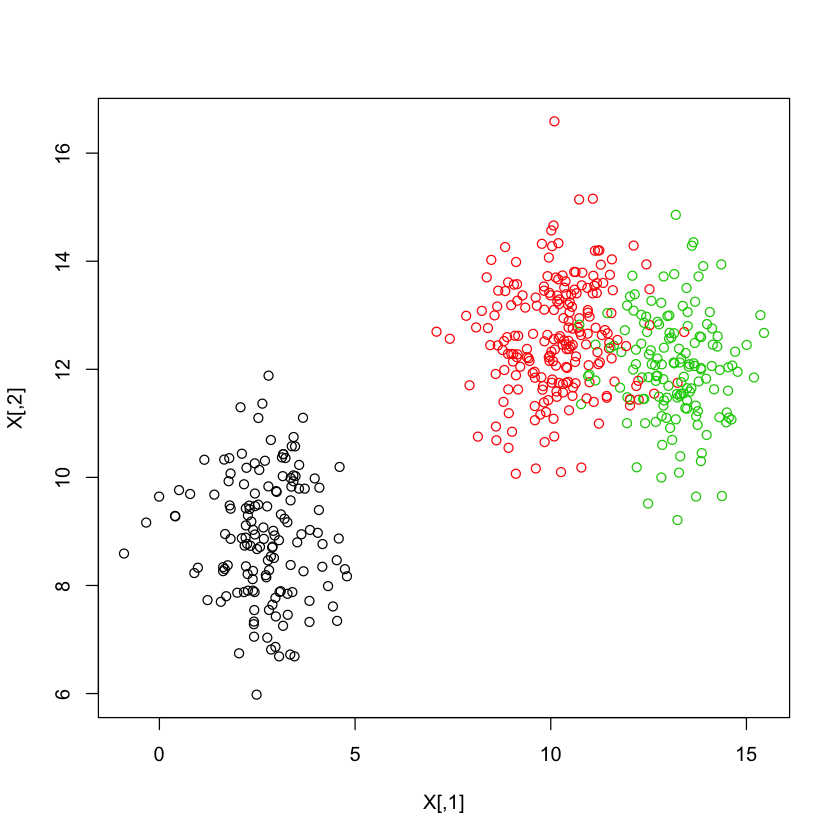

In [89]:
plot(X)
plot(X,col=gr.label) # color with group label

### K-means法
①各点にランダムにクラスタを割り当てる<br>
②クラスタの重心を計算する。<br>
③点のクラスタを、一番近い重心のクラスタに変更する<br>
④変化がなければ終了。変化がある限りは 2. に戻る。<br>

K-means clustering with 3 clusters of sizes 73, 72, 355

Cluster means:
       [,1]      [,2]
1  2.878282  7.998592
2  2.488743  9.839332
3 11.412276 12.359240

Clustering vector:
  [1] 3 3 3 3 3 3 1 3 1 2 2 2 2 3 3 3 3 3 3 3 3 1 2 1 3 3 3 3 2 3 1 3 3 3 2 3 3
 [38] 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 2
 [75] 3 3 2 3 2 3 3 2 1 3 3 3 1 2 3 1 2 2 2 2 3 1 3 3 3 3 2 3 3 3 3 3 1 2 3 2 3
[112] 3 3 3 3 3 3 2 3 1 3 3 1 3 2 3 3 3 3 2 3 3 3 3 3 3 3 1 1 3 1 3 2 3 3 3 3 3
[149] 3 3 3 2 3 3 2 3 3 3 3 2 2 3 3 3 1 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 2 3 3 3
[186] 3 3 3 3 3 1 1 3 3 2 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 1 3 1 2 1 1 3 3 3 3 2
[223] 1 2 2 1 1 3 2 3 3 3 2 3 3 3 1 1 3 2 3 3 3 3 3 3 3 3 1 3 2 3 3 3 3 3 3 3 2
[260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 2 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3
[297] 3 3 1 3 3 1 3 3 3 2 3 2 1 3 3 3 1 3 3 3 1 1 3 3 2 3 3 3 2 3 3 3 3 3 3 3 1
[334] 3 3 2 2 3 1 2 3 3 3 3 1 3 3 3 3 3 3 3 3 2 3 1 3 1 2 3 2 3 1 1 3 3 3 1 3 3
[371] 3 2 1 3 1 2 1 

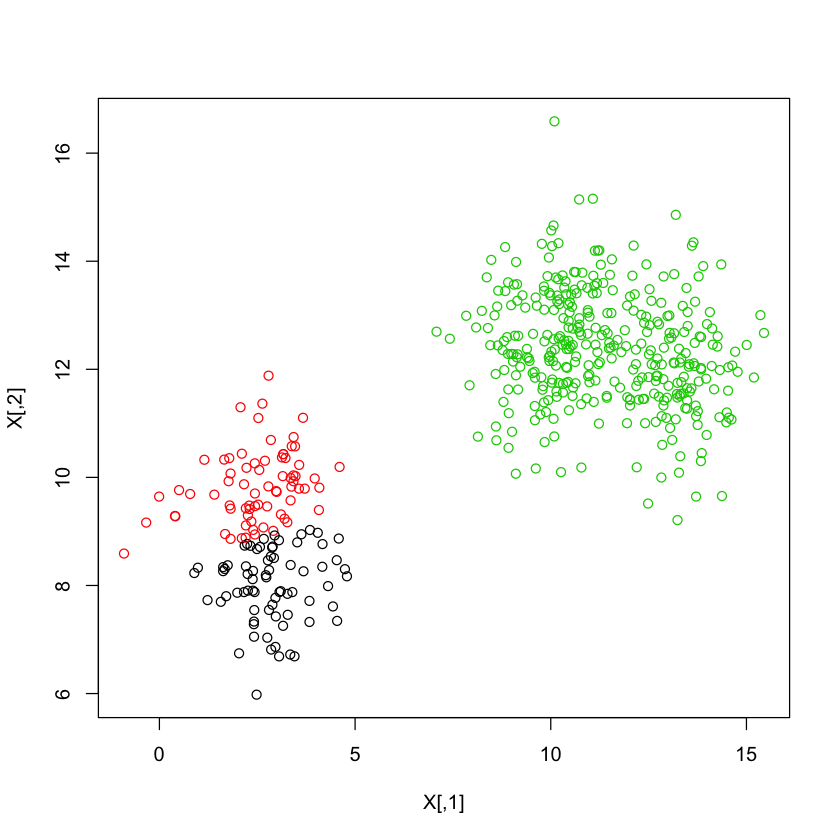

In [112]:
cl <- kmeans(X,n.gr)
plot(X, col = cl$cluster)　#cl$の後にclusterやcentersなどを記載すると出る
cl

In [120]:
head(cl$cluster,10)

[1] 3 3 3 3 3 3 1 3 1 2

In [119]:
head(gr.label,10)

[1] 3 2 3 2 2 2 1 2 1 1

In [123]:
a <- (cl$cluster-1) + 3*(gr.label-1)+1 
head(a,10)

[1] 9 6 9 6 6 6 1 6 1 2

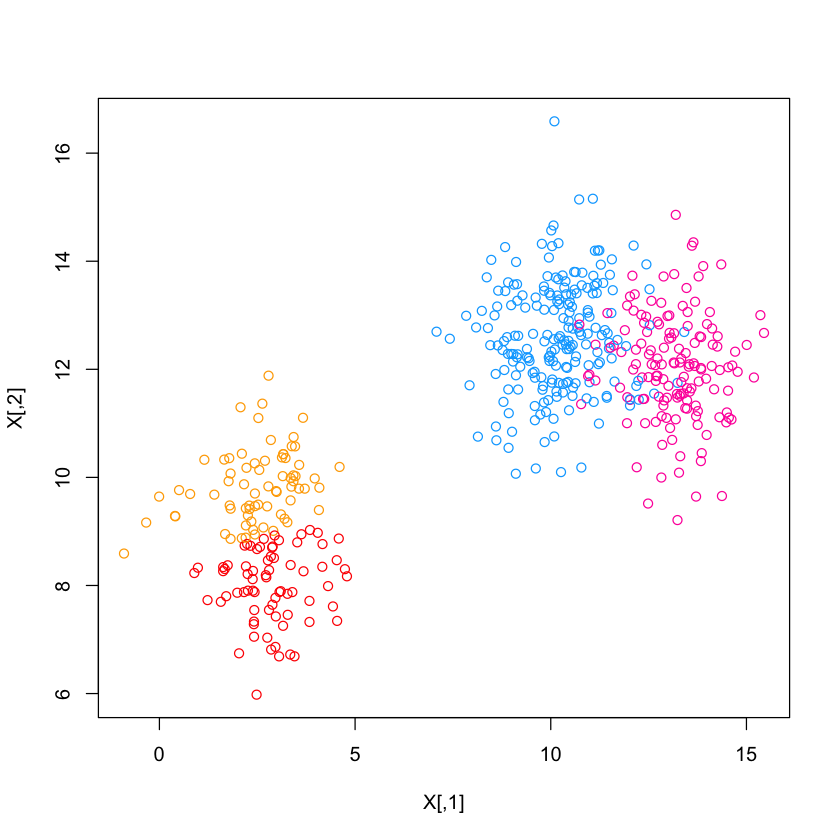

In [121]:
plot(X, col = rainbow(9)[(cl$cluster-1) + 3*(gr.label-1)+1])

## <font color="Red">Assignment 課題 (Math)
<font>
<font color="black">**In the above plot, a formula (cl$cluster-1) + 3^(gr.label-1) + 1 was used to specify 9 patterns, 3 true labels x 3 classification labels. It is ternary numbering system-based conversion. Describe the formula.**<font>

クラスタ分類のラベル・真のラベルの組み合わせは、3*3の9個考えられる。<br>
クラスタ分類のラベルに、真のラベルを3倍したものを加えた変数を考えれば、この9個を表す事が出来る

***